In [ ]:
#load csv
import numpy as np
f_in = open("iris.csv","r")
X = []
y = []
y_kind = {"setosa":0, "versicolor":1,"virginica":2}
for line in f_in.readlines()[1:]:
    parse = line.split(",")
    X.append(map(float,(parse[:4])))
    y.append(y_kind[parse[4].strip("\n")])
 
X = np.array(X)
y = np.array(y)

In [ ]:
#데이터 분포 보기

import pandas as pd
#Import Library Pandas
df = pd.read_csv("iris.csv")
print df

Automatically created module for IPython interactive environment
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1. -1.  1.]


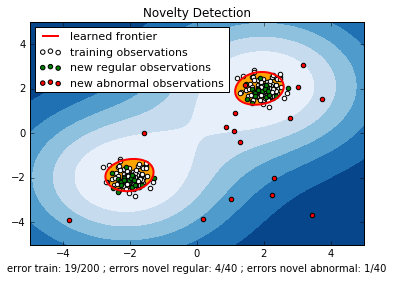

In [26]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print y_pred_test
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

Automatically created module for IPython interactive environment
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
explained variance ratio (first two components): [ 0.92461621  0.05301557]


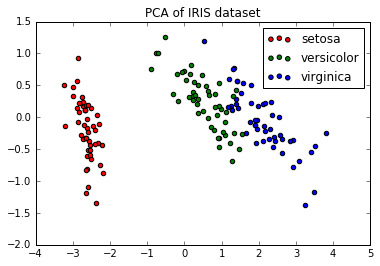

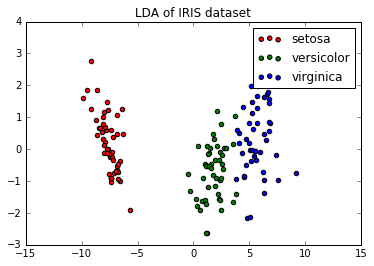

In [18]:
#pca / lda 예제
%matplotlib inline

print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
print y
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()

In [ ]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

###############################################################################
# Data IO and generation

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y, n_folds=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



In [ ]:
import datetime
import time
import random
from pprint import pprint 
from sklearn import tree
from sklearn import metrics
from sklearn.externals import joblib
from sklearn import svm
from sklearn import linear_model, decomposition, datasets
import os
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def new_intergrated_performance(dataset_number):
	data_type = "all"
	print data_type
	in_path = "./data/train_test_set/" + str(dataset_number)
	out_path = "./model/"+ str(dataset_number)
	X_train = []
	y_train = []

	X_test = []
	y_test = []
	#학습 및 진단데이터 입력
	
	print "1"
	for line in open(in_path + "_train_"+data_type+".csv"):
		X_train.append(map(float, line.split(",")[0:-1]))
		y_train.append(line.split(",")[-1].strip("\n"))

	y_train = map(int,y_train)
	print line

	for line in open(in_path + "_test_"+data_type+".csv"):
		X_test.append(map(float, line.split(",")[0:-1]))
		y_test.append(line.split(",")[-1].strip("\n"))

	y_test = map(int,y_test)

	#X_train = preprocessing.scale(X_train)



	names = [   #"Support vector machine",
				#"Random Forest",
				"AdaBoost",
				#"Linear Discriminant Analysis",
				"Quadratic Discriminant Analysis"]
	classifiers = [
		#SVC(max_iter = 1000),
		#RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
		AdaBoostClassifier(),
		#LinearDiscriminantAnalysis(),
		QuadraticDiscriminantAnalysis()]

	clf = ""

	print "2"

	#parameters = [{}]
	print 3
	#모델 있으면 불러오고 아니면 새로 만들어 저장하고 
	past_time = time.time()

	for name, clf in zip(names, classifiers):
		clf.fit(X_train, y_train)
		y_pred = clf.predict(X_test)
		print str(name) +" done, takes " + str(time.time() - past_time)

		print y_pred
		print "-"*40
		print "all data "+ data_type
		print "accuracy : " + str(metrics.accuracy_score(y_test,y_pred))
		print "f1_score : " + str(metrics.f1_score(y_test,y_pred))
		print "roc_auc  : " + str(metrics.roc_auc_score(y_test,y_pred))
		print "precision: " + str(metrics.precision_score(y_test,y_pred))
		print "recall   : " + str(metrics.recall_score(y_test,y_pred))
		print "-"*40

		f_out = open(name + "_" + data_type+".txt", "w")

		f_out.write("all data"+"\n")
		f_out.write("accuracy : " + str(metrics.accuracy_score(y_test,y_pred))+"\n")
		f_out.write("f1_score : " + str(metrics.f1_score(y_test,y_pred))+"\n")
		f_out.write("roc_auc  : " + str(metrics.roc_auc_score(y_test,y_pred))+"\n")
		f_out.write("precision: " + str(metrics.precision_score(y_test,y_pred))+"\n")
		f_out.write("recall   : " + str(metrics.recall_score(y_test,y_pred))+"\n")
		f_out.write("-"*40+"\n")


		y_pred_rf = clf.predict_proba(X_test)[:, 1]
		fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

		plt.figure(name)
		plt.plot([0, 1], [0, 1], 'k--')
		plt.plot(fpr_rf, tpr_rf, label='RF')
		plt.xlabel('False positive rate')
		plt.ylabel('True positive rate')
		plt.title(name + ' ROC curve')
		plt.legend(loc='best')
		plt.show()


		past_time = time.time()
new_intergrated_performance(1)

In [ ]:
import datetime
import time
import random
from pprint import pprint 
from sklearn import tree
from sklearn import metrics
from sklearn.externals import joblib
from sklearn import svm
from sklearn import linear_model, decomposition, datasets
import os
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def new_intergrated_performance(dataset_number):
	data_type = "all"
	print data_type
	in_path = "./data/train_test_set/" + str(dataset_number)
	out_path = "./model/"+ str(dataset_number)
	X_train = []
	y_train = []

	X_test = []
	y_test = []
	#학습 및 진단데이터 입력
	
	print "1"
	for line in open(in_path + "_train_"+data_type+".csv"):
		X_train.append(map(float, line.split(",")[0:-1]))
		y_train.append(line.split(",")[-1].strip("\n"))

	y_train = map(int,y_train)
	print line

	for line in open(in_path + "_test_"+data_type+".csv"):
		X_test.append(map(float, line.split(",")[0:-1]))
		y_test.append(line.split(",")[-1].strip("\n"))

	y_test = map(int,y_test)

	#X_train = preprocessing.scale(X_train)



	names = [   #"Support vector machine",
				#"Random Forest",
				#"AdaBoost",
				"Linear Discriminant Analysis",
				"Quadratic Discriminant Analysis"]
	classifiers = [
		#SVC(max_iter = 1000),
		#RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
		#AdaBoostClassifier(),
		LinearDiscriminantAnalysis(),
		QuadraticDiscriminantAnalysis()]

	clf = ""

	print "2"

	#parameters = [{}]
	print 3
	#모델 있으면 불러오고 아니면 새로 만들어 저장하고 
	past_time = time.time()

	for name, clf in zip(names, classifiers):
		clf.fit(X_train, y_train)
		y_pred = clf.predict(X_test)
		print str(name) +" done, takes " + str(time.time() - past_time)

		print y_pred
		print "-"*40
		print "all data "+ data_type
		print "accuracy : " + str(metrics.accuracy_score(y_test,y_pred))
		print "f1_score : " + str(metrics.f1_score(y_test,y_pred))
		print "roc_auc  : " + str(metrics.roc_auc_score(y_test,y_pred))
		print "precision: " + str(metrics.precision_score(y_test,y_pred))
		print "recall   : " + str(metrics.recall_score(y_test,y_pred))
		print "-"*40


		y_pred_rf = clf.predict_proba(X_test)[:, 1]
		fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

		plt.figure(name)
		plt.plot([0, 1], [0, 1], 'k--')
		plt.plot(fpr_rf, tpr_rf, label='RF')
		plt.xlabel('False positive rate')
		plt.ylabel('True positive rate')
		plt.title(name + ' ROC curve')
		plt.legend(loc='best')
		plt.show()


		past_time = time.time()
new_intergrated_performance(1)

all
1
21,1407,-0.5226089012983561,0,631.0,0,90.0,1,0.0,5.1000000000000005,0,14,-0.7963936125,208.394601164,-213.028524441,-0.739080596033,0.0,-0.522608901298,-0.475894971491,-0.501847154717,-0.490268488355,-0.497877997283,0.0,0.0,0.0467139298071,0.0,0.0,0.8844359143,1159.88659697,1415.81566133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.385596828087,139802.075815,-56748.0423353,886.358350217,6.01040764009,632.5,633.1,631.888888889,630.346153846,629.794117647,-1.5,-3.0,2.0,7.0,0.5,2.49806862694,-163.713040308,122.790642758,127.279220614,0.0,89.25,89.25,89.1666666667,88.9615384615,88.8088235294,0.75,0.75,1.5,1.5,2.25,-0.943936980672,1376.12363994,-1899.89546201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.493912470632,9519.21484353,5125.37622657,7.2124891681,0.0,5.1,5.08,5.07777777778,5.08461538462,5.08823529412,0.0,0.0,0.0,0.0,0.,-1

2